#**Khai b√°o th∆∞ vi·ªán**

---




In [ ]:
import warnings
warnings.filterwarnings('ignore')

ƒë∆∞a ra c·∫£nh b√°o khi ph·∫ßn m·ªÅn ch·∫°y l·ªói

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Th∆∞ vi·ªán d√πng ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

*train_test_split*: Chia t·∫≠p d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra.

*GridSearchCV*: T√¨m ki·∫øm tham s·ªë t·ªëi ∆∞u cho m√¥ h√¨nh b·∫±ng c√°ch th·ª≠ nghi·ªám nhi·ªÅu b·ªô tham s·ªë kh√°c nhau.

*StandardScaler*: Chu·∫©n h√≥a d·ªØ li·ªáu s·ªë ƒë·ªÉ c√≥ gi√° tr·ªã trung b√¨nh b·∫±ng 0 v√† ph∆∞∆°ng sai b·∫±ng 1.

*OneHotEncoder*: M√£ h√≥a bi·∫øn ph√¢n lo·∫°i (categorical features) th√†nh d·∫°ng nh·ªã ph√¢n (0-1).

*ColumnTransformer*: D√πng ƒë·ªÉ √°p d·ª•ng c√°c b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu kh√°c nhau cho c√°c c·ªôt kh√°c nhau trong t·∫≠p d·ªØ li·ªáu.

*RandomForestClassifier*: M√¥ h√¨nh h·ªçc m√°y d·ª±a tr√™n nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh (Decision Trees), gi√∫p ph√¢n lo·∫°i t·ªët v√† gi·∫£m overfitting.

*accuracy_score*: ƒê√°nh gi√° ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh.

*classification_report*: Hi·ªÉn th·ªã c√°c ch·ªâ s·ªë ƒë√°nh gi√° m√¥ h√¨nh nh∆∞ Precision, Recall, F1-score.

*confusion_matrix:* Ma tr·∫≠n th·ªÉ hi·ªán s·ªë l∆∞·ª£ng d·ª± ƒëo√°n ƒë√∫ng/sai gi·ªØa c√°c l·ªõp.

*Pipeline*: Chu·ªói h√≥a c√°c b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω v√† hu·∫•n luy·ªán m√¥ h√¨nh ƒë·ªÉ d·ªÖ d√†ng tri·ªÉn khai.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

In [ ]:
pd.options.display.float_format = "{:.2f}".format

ƒê·ªãnh d·∫°ng s·ªë th·∫≠p ph√¢n

**D·ªØ Li·ªáu ƒë·∫ßu v√†o**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/dataset - dataset.csv")

In [ ]:
df.head()

gender   age  hypertension  heart_disease smoking_history   bmi  \
0  Female 80.00             0              1           never 25.19   
1  Female 54.00             0              0         No Info 27.32   
2    Male 28.00             0              0           never 27.32   
3  Female 36.00             0              0         current 23.45   
4    Male 76.00             1              1         current 20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0         6.60                  140         0  
1         6.60                   80         0  
2         5.70                  158         0  
3         5.00                  155         0  
4         4.80                  155         0

hi·ªÉn th·ªã 1 s·ªë d√≤ng ƒë·∫ßu c·ªßa dataset-m·∫∑c ƒë·ªãnh l√† 5.

#**Ph√¢n t√≠ch d·ªØ li·ªáu**

---



##**1.Ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu**

**X·ª≠ l√Ω c√°c b·∫£n sao**

In [ ]:
print("number of rows: ", df.shape[0])
duplicate_rows_data = df.duplicated().sum()
print("number of duplicate rows:",duplicate_rows_data)
ratio = round((duplicate_rows_data / df.shape[0]) * 100, 2)
print("Ratio(%):", ratio, "%")

number of rows:  10138
number of duplicate rows: 49
Ratio(%): 0.48 %


In [ ]:
df = df.drop_duplicates()

lo·∫°i b·ªè nh·ªØng m·∫´u th·ª≠ tr√πng l·∫∑p

**S·ª± ƒëa d·∫°ng c·ªßa d·ªØ li·ªáu**

In [ ]:
# @title VƒÉn b·∫£n ti√™u ƒë·ªÅ m·∫∑c ƒë·ªãnh
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f" {column}: {num_distinct_values} distinct values")

 gender: 2 distinct values
 age: 88 distinct values
 hypertension: 2 distinct values
 heart_disease: 2 distinct values
 smoking_history: 6 distinct values
 bmi: 2591 distinct values
 HbA1c_level: 18 distinct values
 blood_glucose_level: 18 distinct values
 diabetes: 2 distinct values


Nh√£n v√† c√°c gi√° tr·ªã ri√™ng bi·ªát c·ªßa n√≥

**C√°c gi√° tr·ªã c√≤n thi·∫øu**

In [ ]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Ki·ªÉm tra nh·ªØng m·∫´u th·ª≠ ƒëi·ªÅn c√≤n tr·ªëng trong t·ª´ng c·ªôt

In [ ]:
df['gender'].value_counts()


gender
Female    5845
Male      4244
Name: count, dtype: int64

In [ ]:
df = df[df['gender'] != 'Other']

Lo·∫°i B·ªè gi√° tr·ªã kh√¥ng c·∫ßn thi·∫øt

**M√¥ t·∫£ d·ªØ li·ªáu**

In [ ]:
df.describe().style.format("{:.2f}")

##**2.Ph√¢n t√≠ch ƒë∆°n bi·∫øn**

**Histogram for age**

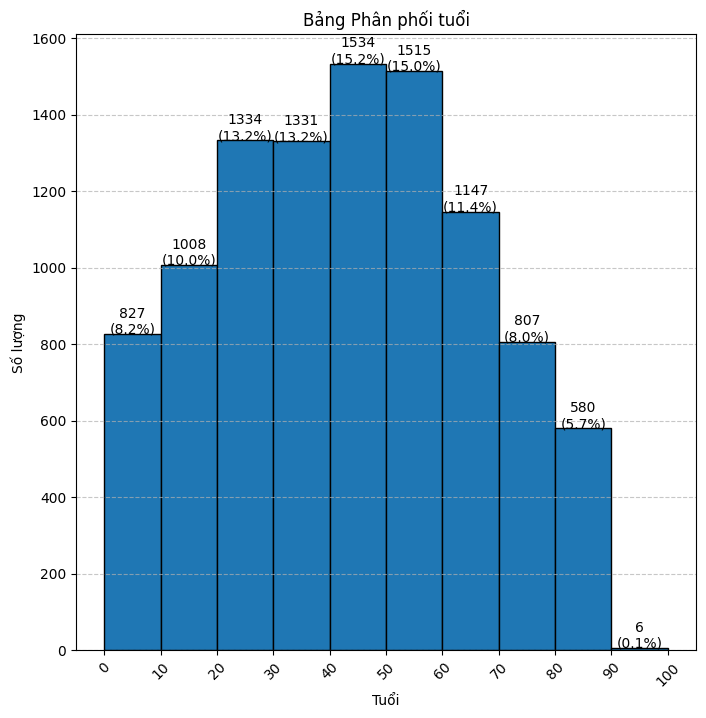

In [ ]:
bin_edges = np.arange(0, 110, 10)

plt.figure(figsize=(8, 8))
counts, _, _ = plt.hist(df['age'].dropna(), bins=bin_edges, edgecolor='black')

total = counts.sum()

for count, x in zip(counts, bin_edges[:-1]):
    percent = (count / total) * 100
    plt.text(x + 5, count + 0.5, f'{int(count)}\n({percent:.1f}%)', ha='center', fontsize=10)

plt.title('B·∫£ng Ph√¢n ph·ªëi tu·ªïi')
plt.xlabel('Tu·ªïi')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.xticks(bin_edges, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


B·∫£ng ph√¢n b·ªë ph·ªï c√°c nh√≥m tu·ªïi c·ªßa c√°c m·∫´u kh·∫£o s√°t

**Bar plot for gender**

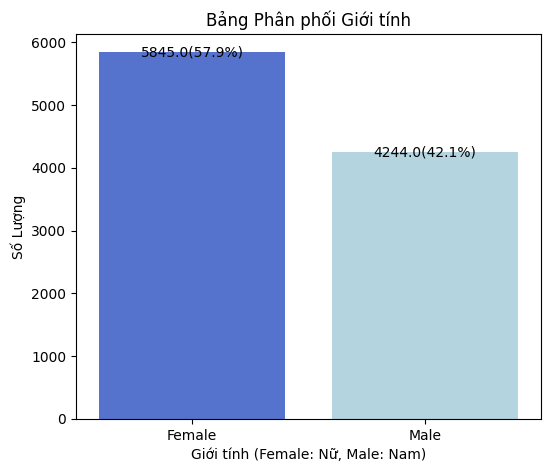

In [ ]:
plt.figure(figsize=(6, 5))

ax = sns.countplot(x='gender', data=df, palette=['royalblue', 'lightblue'])

total = len(df)

for p in ax.patches:
    count = p.get_height()
    percent = (count / total) * 100
    ax.text(p.get_x() + p.get_width() / 2, count + 0.5, f'{count}({percent:.1f}%)', ha='center',va = 'center', fontsize=10)

plt.title('B·∫£ng Ph√¢n ph·ªëi Gi·ªõi t√≠nh')
plt.xlabel('Gi·ªõi t√≠nh (Female: N·ªØ, Male: Nam)')
plt.ylabel('S·ªë L∆∞·ª£ng')
plt.show()


B·∫£ng ph√¢n b·ªë gi·ªõi t√≠nh c·ªßa c√°c m·∫´u kh·∫£o s√°t

**Distribution plot for BMI**

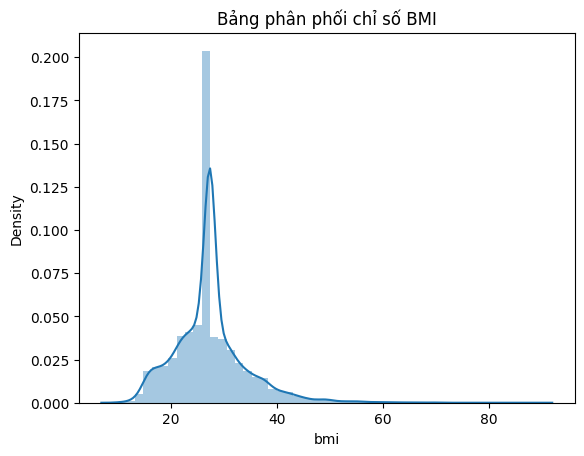

In [ ]:
sns.distplot(df['bmi'], bins=50)
plt.title('B·∫£ng ph√¢n ph·ªëi ch·ªâ s·ªë BMI')
plt.show()

**Count plots for binary variables**

·ªû Missing value v√† dataset ta th·∫•y c√≥ 3 c·ªôt: hypertention, heart_disease v√† diabetes l√† nh·ªØng gi√° tr·ªã binary variables.

Count plots for binary variables

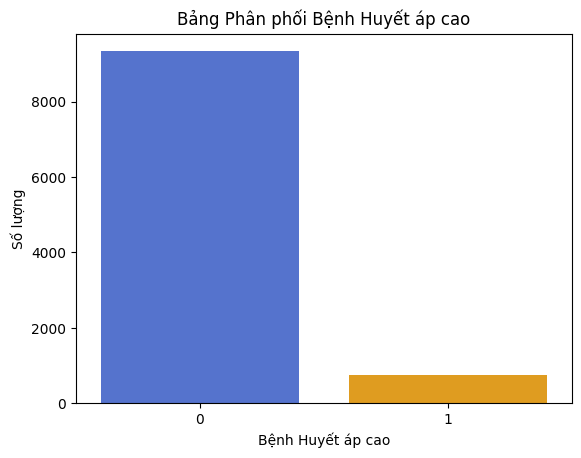

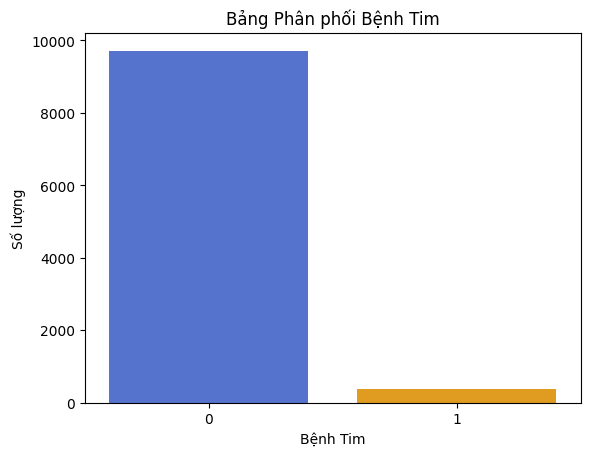

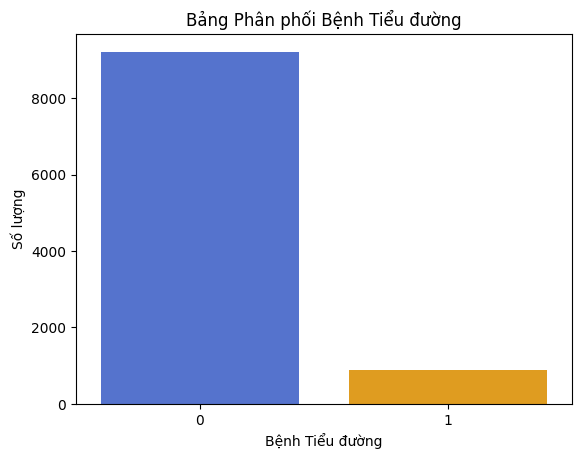

In [ ]:
title_labels = {
    'hypertension': 'B·∫£ng Ph√¢n ph·ªëi B·ªánh Huy·∫øt √°p cao','heart_disease': 'B·∫£ng Ph√¢n ph·ªëi B·ªánh Tim','diabetes': 'B·∫£ng Ph√¢n ph·ªëi B·ªánh Ti·ªÉu ƒë∆∞·ªùng'
}
column_labels = {
    'hypertension': 'B·ªánh Huy·∫øt √°p cao','heart_disease': 'B·ªánh Tim','diabetes': 'B·ªánh Ti·ªÉu ƒë∆∞·ªùng'
}
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df,palette=['royalblue', 'orange'])
    plt.title(title_labels[col])
    plt.xlabel(column_labels[col])
    plt.ylabel('S·ªë l∆∞·ª£ng')
    plt.show()

=> C√≥ s·ª± ph√¢n b·ªë kh√¥ng ƒë·ªÅu gi·ªØa 2 gi√° tr·ªã 0 v√† 1

**Count plot for smoking history**

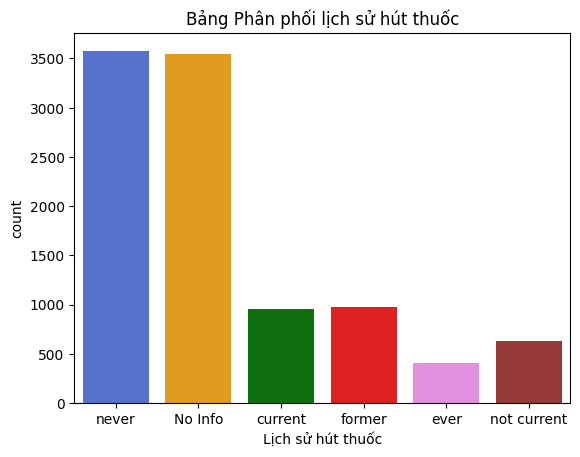

In [ ]:
sns.countplot(x='smoking_history', data=df, palette=['royalblue', 'orange', 'green', 'red','violet', 'brown'])
plt.title('B·∫£ng Ph√¢n ph·ªëi l·ªãch s·ª≠ h√∫t thu·ªëc')
plt.xlabel('L·ªãch s·ª≠ h√∫t thu·ªëc')
plt.show()

never: Kh√¥ng bao gi·ªù h√∫t thu·ªëc

No Info: Kh√¥ng c√≥ th√¥ng tin

current: Hi·ªán t·∫°i ƒëang s·ª≠ d·ª•ng thu·ªëc l√°


former: Tr∆∞·ªõc ƒë√≥ c√≥ s·ª≠ d·ª•ng thu·ªëc l√°

ever: th∆∞·ªùng xuy√™n s·ª≠ d·ª•ng thu·ªëc l√°

not current: Kh√¥ng ph·∫£i hi·ªán t·∫°i s·ª≠ d·ª•ng thu·ªëc l√°

##**3.Ph√¢n t√≠ch hai bi·∫øn**

**Boxplot BMI vs Diabetes classification**

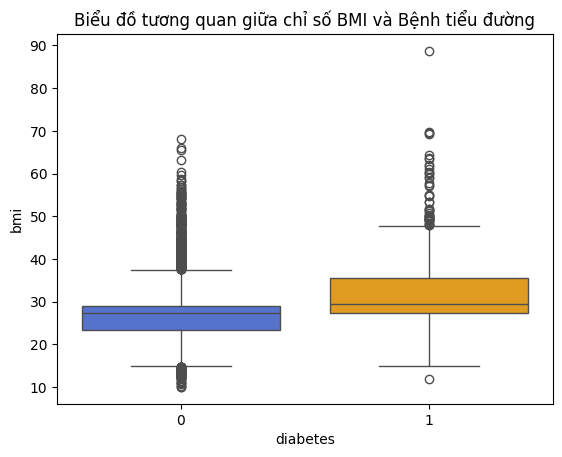

In [ ]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette=['royalblue', 'orange'])
plt.title('Bi·ªÉu ƒë·ªì t∆∞∆°ng quan gi·ªØa ch·ªâ s·ªë BMI v√† B·ªánh ti·ªÉu ƒë∆∞·ªùng')
plt.show()

**Boxplot Age vs Diabetes classification**

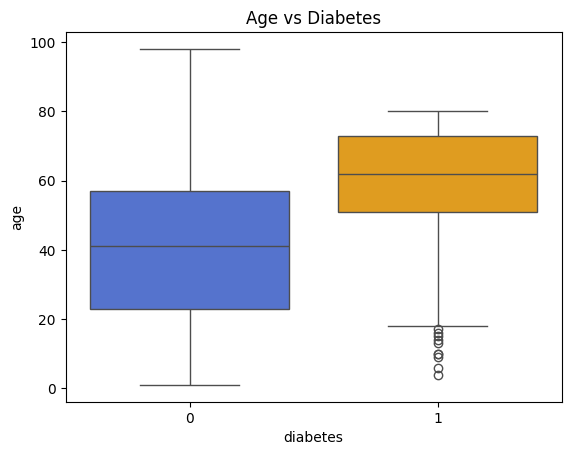

In [ ]:
sns.boxplot(x='diabetes', y='age', data=df,palette=['royalblue', 'orange'])
plt.title('Age vs Diabetes')
plt.show()

**Count plot of gender vs diabetes**

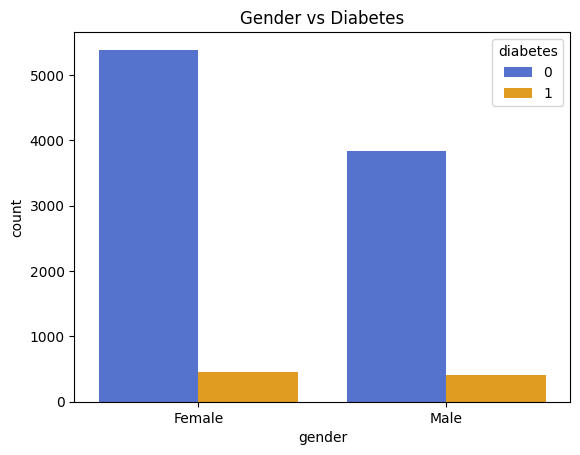

In [ ]:
sns.countplot(x='gender', hue='diabetes', data=df,palette=['royalblue', 'orange'])
plt.title('Gender vs Diabetes')
plt.show()

**Boxplot HbA1c level vs Diabetes classification**

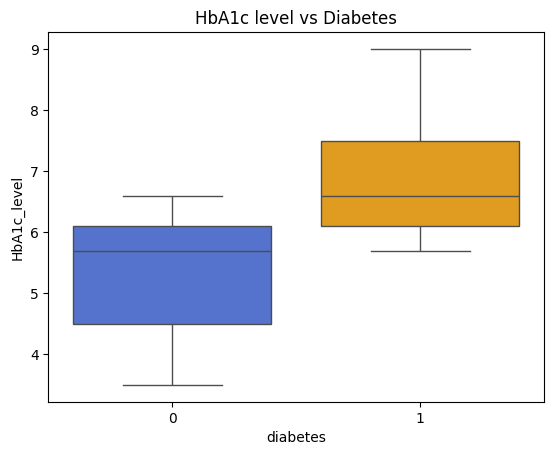

In [ ]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df,palette=['royalblue', 'orange'])
plt.title('HbA1c level vs Diabetes')
plt.show()

**Boxplot blood glucose level vs Diabetes classification**

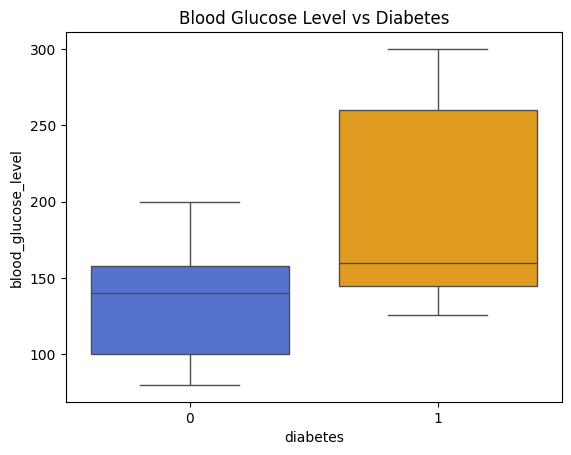

In [ ]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df,palette=['royalblue', 'orange'])
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

##**4.Ph√¢n t√≠ch ƒëa bi·∫øn**




**Scatterplot Age vs BMI colored by Diabetes classification**

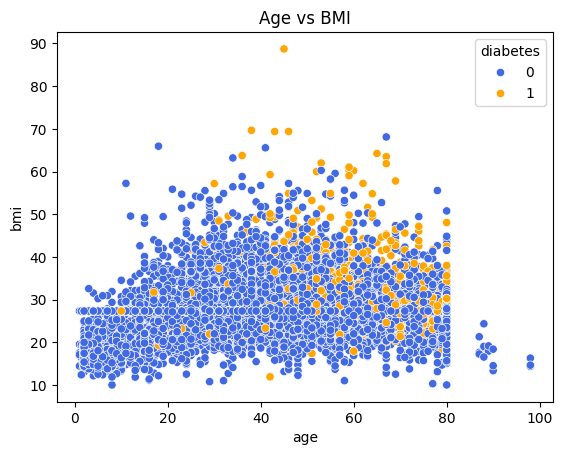

In [ ]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df,palette=['royalblue', 'orange'])
plt.title('Age vs BMI')
plt.show()

**Violin plot of BMI against diabetes classification split by gender**

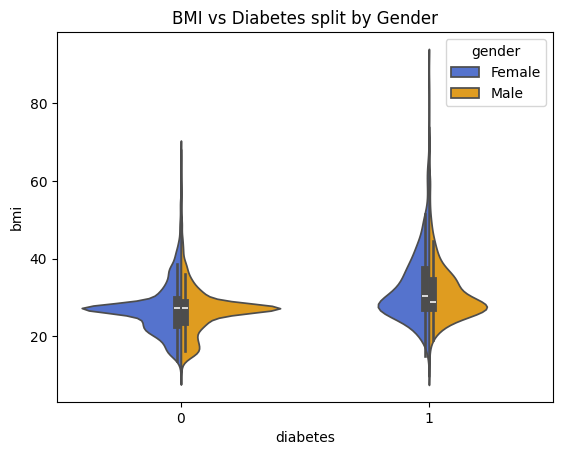

In [ ]:
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df,palette=['royalblue', 'orange'])
plt.title('BMI vs Diabetes split by Gender')
plt.show()

**Interaction between gender, BMI and diabetes**

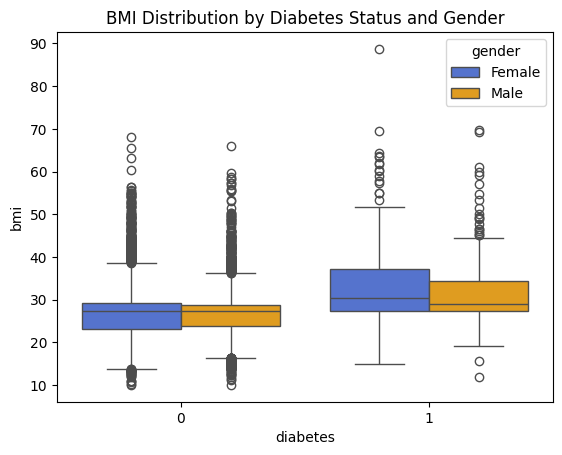

In [ ]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df,palette=['royalblue', 'orange'])
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

**Interaction between gender, Age and diabetes**

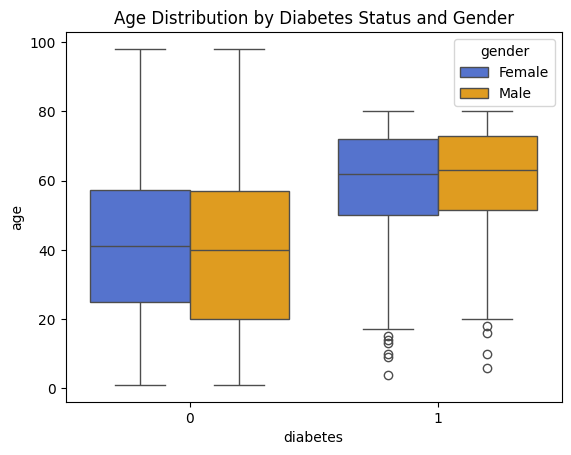

In [ ]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=df,palette=['royalblue', 'orange'])
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

#**T∆∞∆°ng quan**

---



##**1.ƒê·ªãnh d·∫°ng l·∫°i gi√° tr·ªã**

In [ ]:
print(df['smoking_history'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']


Ki·ªÉm tra c√°c gi√° tr·ªã trong c·ªôt smoking_history

In [ ]:
def recategorize_smoking(smoking_history):
    if smoking_history in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_history == 'current':
        return 'current'
    elif smoking_history in ['ever', 'former', 'not current']:
        return 'past_smoker'
    else:
        return 'unknown'
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

In [ ]:
print(df['smoking_history'].unique())

['non-smoker' 'current' 'past_smoker']


C√°c gi√° tr·ªã trong c·ªôt smoking_history khi ƒë∆∞·ª£c chu·∫©n h√≥a

In [ ]:
df['smoking_history'].value_counts()

smoking_history
non-smoker     7125
past_smoker    2011
current         953
Name: count, dtype: int64

In [ ]:
data = df.copy()
data1 = df.copy()

## **2.M√£ h√≥a d·ªØ li·ªáu**

**One Hot Encoding** L√† m·ªôt ph∆∞∆°ng ph√°p chuy·ªÉn ƒë·ªïi c√°c bi·∫øn ph√¢n lo·∫°i th√†nh ƒë·ªãnh d·∫°ng nh·ªã ph√¢n. N√≥ t·∫°o ra c√°c c·ªôt m·ªõi cho t·ª´ng danh m·ª•c, trong ƒë√≥ 1 c√≥ nghƒ©a l√† danh m·ª•c ƒë√≥ c√≥ m·∫∑t v√† 0 c√≥ nghƒ©a l√† kh√¥ng c√≥. M·ª•c ƒë√≠ch ch√≠nh c·ªßa **One-Hot Encoding** l√† ƒë·∫£m b·∫£o r·∫±ng d·ªØ li·ªáu ph√¢n lo·∫°i c√≥ th·ªÉ ƒë∆∞·ª£c s·ª≠ d·ª•ng hi·ªáu qu·∫£ trong c√°c m√¥ h√¨nh h·ªçc m√°y.#geekforgeeks

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df
# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')
# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [ ]:
print(data.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'smoking_history_current', 'smoking_history_non-smoker',
       'smoking_history_past_smoker'],
      dtype='object')


##**3.Ma tr·∫≠n t∆∞∆°ng quan**

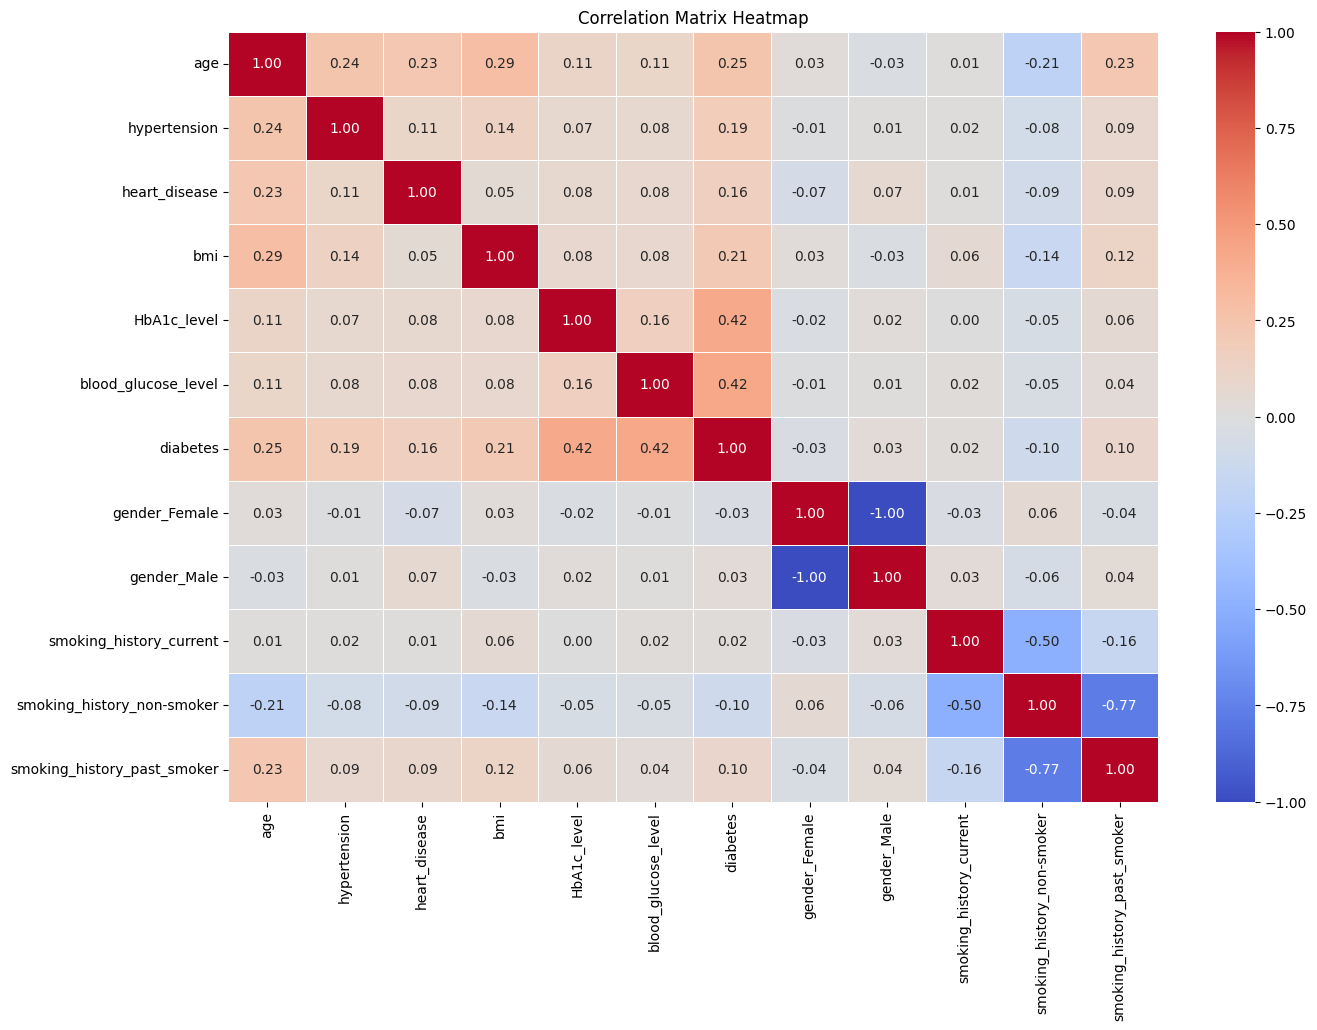

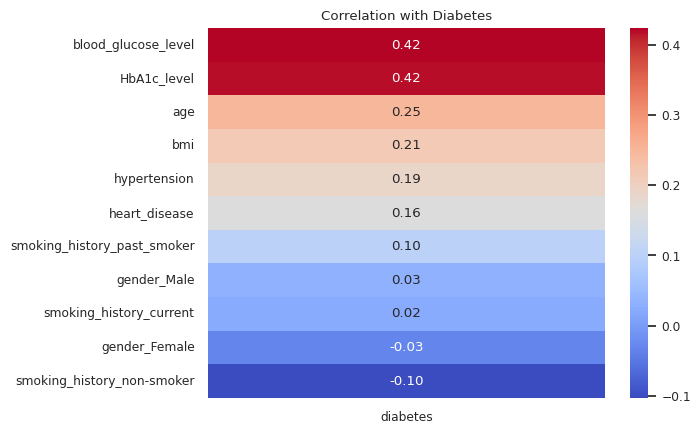

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

#**Ph√¢n t√≠ch d·ª± ƒëo√°n**

---



## **1.S·ª± m·∫•t c√¢n b·∫±ng gi·ªØa c√°c l·ªõp**

T·ª´ ph√¢n t√≠ch kh√°m ph√° d·ªØ li·ªáu(EDA), t·∫≠p d·ªØ li·ªáu b·ªã m·∫•t c√¢n b·∫±ng (v·ªõi 9% tr∆∞·ªùng h·ª£p m·∫Øc b·ªánh ti·ªÉu ƒë∆∞·ªùng v√† 91% tr∆∞·ªùng h·ª£p c√≤n l·∫°i √¢m t√≠nh). Do ƒë√≥, c·∫ßn c√¢n b·∫±ng d·ªØ li·ªáu ƒë·ªÉ ƒë·∫£m b·∫£o r·∫±ng m√¥ h√¨nh kh√¥ng b·ªã thi√™n l·ªách v·ªÅ ph√≠a l·ªõp chi·∫øm ƒëa s·ªë. ƒê·ªÉ l√†m ƒëi·ªÅu n√†y, k·ªπ thu·∫≠t t·ªïng h·ª£p m·∫´u thi·ªÉu s·ªë (SMOTE) ƒë∆∞·ª£c s·ª≠ d·ª•ng, gi√∫p t·∫°o ra c√°c m·∫´u t·ªïng h·ª£p cho l·ªõp thi·ªÉu s·ªë.

Count plot for the 'diabetes' variable

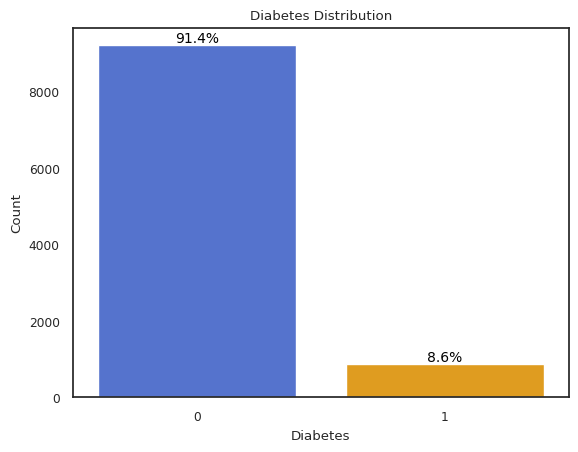

In [ ]:
total = len(df)
ax = sns.countplot(x='diabetes', data=df, palette=('royalblue', 'orange'))

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Diabetes Distribution')
plt.ylabel('Count')
plt.xlabel('Diabetes')
plt.show()


T√°i l·∫•y m·∫´u

In [ ]:
over = SMOTE(sampling_strategy=0.1) #TƒÉng s·ªë l∆∞·ª£ng m·∫´u c·ªßa l·ªõp thi·ªÉu s·ªë (d∆∞∆°ng t√≠nh v·ªõi ti·ªÉu ƒë∆∞·ªùng) l√™n 10% so v·ªõi l·ªõp ƒëa s·ªë
under = RandomUnderSampler(sampling_strategy=0.5) #Gi·∫£m s·ªë l∆∞·ª£ng m·∫´u c·ªßa l·ªõp ƒëa s·ªë xu·ªëng c√≤n g·∫•p 2 l·∫ßn l·ªõp thi·ªÉu s·ªë

##**2.Ti·ªÅn x·ª≠ l√Ω: Scaler**

Ti·ªÅn x·ª≠ l√Ω l√† m·ªôt b∆∞·ªõc quan tr·ªçng tr∆∞·ªõc khi hu·∫•n luy·ªán m√¥ h√¨nh. Trong tr∆∞·ªùng h·ª£p n√†y, c√°c ƒë·∫∑c tr∆∞ng s·ªë ƒë∆∞·ª£c chu·∫©n h√≥a (lo·∫°i b·ªè gi√° tr·ªã trung b√¨nh v√† ƒë∆∞a v·ªÅ ph∆∞∆°ng sai ƒë∆°n v·ªã), c√≤n c√°c ƒë·∫∑c tr∆∞ng ph√¢n lo·∫°i ƒë∆∞·ª£c m√£ h√≥a one-hot. M·∫∑c d√π kh√¥ng ph·∫£i t·∫•t c·∫£ c√°c m√¥ h√¨nh ƒë·ªÅu y√™u c·∫ßu chu·∫©n h√≥a, nh∆∞ng ƒë√¢y th∆∞·ªùng l√† m·ªôt th·ª±c h√†nh t·ªët. Vi·ªác m√£ h√≥a one-hot l√† c·∫ßn thi·∫øt ƒë·ªÉ c√°c bi·∫øn ph√¢n lo·∫°i c√≥ th·ªÉ ƒë∆∞·ª£c m√¥ h√¨nh h·ªçc m√°y hi·ªÉu ƒë√∫ng.

StandardScaler trong th∆∞ vi·ªán sklearn gi·∫£ ƒë·ªãnh r·∫±ng d·ªØ li·ªáu Y c√≥ th·ªÉ kh√¥ng tu√¢n theo ph√¢n ph·ªëi Gauss (chu·∫©n), nh∆∞ng v·∫´n bi·∫øn ƒë·ªïi n√≥ sao cho ph√¢n ph·ªëi c·ªßa d·ªØ li·ªáu c√≥ gi√° tr·ªã trung b√¨nh b·∫±ng 0 v√† ƒë·ªô l·ªách chu·∫©n b·∫±ng 1.
N√≥i c√°ch kh√°c, v·ªõi m·ªôt vector ƒë·∫∑c tr∆∞ng x, StandardScaler s·∫Ω bi·∫øn ƒë·ªïi c√°c gi√° tr·ªã theo c√¥ng th·ª©c:

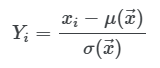
Trong ƒë√≥:

ùë•
ùëñ
‚Äã
l√† ph·∫ßn t·ª≠ th·ª©
ùëñ
c·ªßa vector ƒë·∫∑c tr∆∞ng ban ƒë·∫ßu.

ùúá
(
ùë•
‚Éó
)
l√† gi√° tr·ªã trung b√¨nh c·ªßa vector ƒë·∫∑c tr∆∞ng.

ùúé
(
ùë•
‚Éó
)
l√† ƒë·ªô l·ªách chu·∫©n c·ªßa vector ƒë·∫∑c tr∆∞ng.

D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c bi·∫øn ƒë·ªïi
ùëå
 (m·ªói ph·∫ßn t·ª≠
ùëå
ùëñ
‚Äã) s·∫Ω c√≥ c√°c t√≠nh ch·∫•t sau:

mean
(
ùëå
)
=
0 and
std
(
ùëå
)
=
1

Qu√° tr√¨nh bi·∫øn ƒë·ªïi n√†y c√≤n ƒë∆∞·ª£c g·ªçi l√† chu·∫©n h√≥a Z-score (Z-score normalization).

*ƒê·ªãnh nghƒ©a b·ªô ti·ªÅn x·ª≠ l√Ω*

In [ ]:
preprocessor = ColumnTransformer( transformers=[('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension' ,'heart_disease']),('cat', OneHotEncoder(), ['gender','smoking_history'])])

In [ ]:
transformed_data = preprocessor.fit_transform(data1)
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history'])
new_feature_names = list(num_features) + list(cat_features)

processed_df = pd.DataFrame(transformed_data, columns=new_feature_names)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print(processed_df)

        age   bmi  HbA1c_level  blood_glucose_level  hypertension  \
0      1.69 -0.32         1.00                 0.05         -0.28   
1      0.52 -0.00         1.00                -1.40         -0.28   
2     -0.66 -0.00         0.16                 0.49         -0.28   
3     -0.30 -0.58        -0.48                 0.42         -0.28   
4      1.51 -1.08        -0.67                 0.42          3.52   
...     ...   ...          ...                  ...           ...   
10084  0.34 -0.00        -0.94                -1.16         -0.28   
10085  0.70  0.32         0.26                -1.16         -0.28   
10086 -1.07  0.39        -0.67                -1.16         -0.28   
10087  0.79 -0.16        -0.48                 1.51         -0.28   
10088 -1.47 -0.00         0.26                 0.05         -0.28   

       heart_disease  gender_Female  gender_Male  smoking_history_current  \
0               5.09           1.00         0.00                     0.00   
1              -0

##**3.T√°ch d·ªØ li·ªáu th√†nh nh√£n v√† bi·∫øn m·ª•c ti√™u**

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

*T·∫°o m·ªôt pipeline ƒë·ªÉ ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu, l·∫•y m·∫´u l·∫°i d·ªØ li·ªáu v√† hu·∫•n luy·ªán b·ªô ph√¢n lo·∫°i*

In [ ]:
clf = imbPipeline(steps=[('preprocessor', preprocessor),('over', over),('under', under),('classifier', RandomForestClassifier())])

*X√¢y d·ª±ng m√¥ h√¨nh v√† tinh ch·ªânh tham s·ªë*

M·ªôt pipeline ƒë∆∞·ª£c x√¢y d·ª±ng, trong ƒë√≥ tr∆∞·ªõc ti√™n √°p d·ª•ng c√°c b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu, sau ƒë√≥ hu·∫•n luy·ªán m·ªôt m√¥ h√¨nh tr√™n d·ªØ li·ªáu.

C√°c si√™u tham s·ªë c·ªßa m√¥ h√¨nh ƒë∆∞·ª£c tinh ch·ªânh b·∫±ng **GridSearchCV**, ph∆∞∆°ng ph√°p th·ª±c hi·ªán t√¨m ki·∫øm to√†n di·ªán tr√™n c√°c gi√° tr·ªã tham s·ªë ƒë∆∞·ª£c ch·ªâ ƒë·ªãnh cho b·ªô ∆∞·ªõc l∆∞·ª£ng. M√¥ h√¨nh c√≥ hi·ªáu su·∫•t t·ªët nh·∫•t ƒë∆∞·ª£c ch·ªçn d·ª±a tr√™n **cross-validation (x√°c th·ª±c ch√©o)**.

*ƒê·ªãnh nghƒ©a tham s·ªë v√† gi√° tr·ªã ch√∫ng ta mu·ªën ki·∫øm tra*

In [ ]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5) #Ph∆∞∆°ng ph√°p t√¨m ki·∫øm si√™u tham s·ªë t·ªëi ∆∞u b·∫±ng c√°ch th·ª≠ nghi·ªám nhi·ªÅu t·ªï h·ª£p gi√° tr·ªã kh√°c nhau
# Chia d·ªØ li·ªáu ƒë·ªÉ t·∫≠p hu·∫•n v√† ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#
# Train the model
grid_search.fit(X_train, y_train)
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_resampled, y_resampled = over.fit_resample(X_train_processed, y_train)
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

# Hi·ªÉn th·ªã t·ª∑ l·ªá ph·∫ßn trƒÉm sau khi t√°i l·∫•y m·∫´u
resampled_distribution = Counter(y_resampled)
total_resampled = sum(resampled_distribution.values())
resampled_df = pd.DataFrame.from_dict(resampled_distribution, orient='index', columns=['S·ªë l∆∞·ª£ng'])
resampled_df['T·ª∑ l·ªá (%)'] = (resampled_df['S·ªë l∆∞·ª£ng'] / total_resampled) * 100
print(resampled_df)

# Tr·ª±c quan h√≥a ph√¢n ph·ªëi d·ªØ li·ªáu sau khi t√°i l·∫•y m·∫´u
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_resampled, palette=['royalblue', 'orange'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_resampled:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Diabetes Distribution After Resampling")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()


NameError: name 'Counter' is not defined

In [ ]:
print("S·ªë m·∫´u ban ƒë·∫ßu:", len(df))
print("S·ªë m·∫´u sau train_test_split - Train:", len(y_train), "Test:", len(y_test))
print("S·ªë m·∫´u sau SMOTE + RandomUnderSampler:", len(y_resampled))


*Di·ªÖn gi·∫£i k·∫øt qu·∫£*

K·∫øt qu·∫£ cho th·∫•y c√°c tham s·ªë t·ªëi ∆∞u cho m√¥ h√¨nh **Random Forest** ƒë∆∞·ª£c t√¨m th·∫•y trong qu√° tr√¨nh tinh ch·ªânh si√™u tham s·ªë:

**max_depth = 10**: ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† ƒë·ªô s√¢u t·ªëi ƒëa c·ªßa c√°c c√¢y trong r·ª´ng l√† 10 m·ª©c. Vi·ªác gi·ªõi h·∫°n ƒë·ªô s√¢u c·ªßa c√¢y gi√∫p gi·∫£m hi·ªán t∆∞·ª£ng overfitting. K·∫øt qu·∫£ n√†y cho th·∫•y m·ªôt c√¢y c√≥ ƒë·ªô ph·ª©c t·∫°p trung b√¨nh ho·∫°t ƒë·ªông t·ªët nh·∫•t v·ªõi d·ªØ li·ªáu. N·∫øu c√¢y qu√° nhi·ªÅu, n√≥ c√≥ th·ªÉ h·ªçc c·∫£ nhi·ªÖu c·ªßa d·ªØ li·ªáu, trong khi n·∫øu qu√° √≠t, n√≥ c√≥ th·ªÉ kh√¥ng h·ªçc ƒë∆∞·ª£c c·∫•u tr√∫c th·ª±c s·ª± c·ªßa d·ªØ li·ªáu.

**min_samples_leaf = 4**: Tham s·ªë n√†y quy ƒë·ªãnh r·∫±ng m·ªói n√∫t l√° (n√∫t cu·ªëi c√πng c·ªßa c√¢y quy·∫øt ƒë·ªãnh, n∆°i t·∫°o ra d·ª± ƒëo√°n) ph·∫£i ch·ª©a √≠t nh·∫•t hai m·∫´u. Gi·ªëng nh∆∞ max_depth, tham s·ªë n√†y gi√∫p ki·ªÉm so√°t overfitting. B·∫±ng c√°ch y√™u c·∫ßu √≠t nh·∫•t hai m·∫´u ƒë·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n, m√¥ h√¨nh tr√°nh ƒë∆∞·ª£c vi·ªác kh·ªõp v·ªõi c√°c m·∫´u nhi·ªÖu ho·∫∑c ngo·∫°i l·ªá trong d·ªØ li·ªáu hu·∫•n luy·ªán.

**min_samples_split = 10**: Nghƒ©a l√† m·ªôt n√∫t ph·∫£i ch·ª©a √≠t nh·∫•t hai m·∫´u th√¨ m·ªõi c√≥ th·ªÉ ƒë∆∞·ª£c t√°ch ra (ƒë·ªÉ t·∫°o ra hai n√∫t con). Tham s·ªë n√†y c≈©ng gi√∫p ki·ªÉm so√°t overfitting t∆∞∆°ng t·ª± nh∆∞ min_samples_leaf.

**n_estimators = 200**: ƒê√¢y l√† s·ªë l∆∞·ª£ng c√¢y quy·∫øt ƒë·ªãnh trong r·ª´ng. Thu·∫≠t to√°n Random Forest ho·∫°t ƒë·ªông b·∫±ng c√°ch l·∫•y trung b√¨nh d·ª± ƒëo√°n c·ªßa nhi·ªÅu c√¢y quy·∫øt ƒë·ªãnh ƒë·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n cu·ªëi c√πng, gi√∫p gi·∫£m overfitting v√† ƒë·ªô bi·∫øn ƒë·ªông c·ªßa m√¥ h√¨nh. Trong tr∆∞·ªùng h·ª£p n√†y, c√≥ v·∫ª nh∆∞ 50 c√¢y trong r·ª´ng mang l·∫°i hi·ªáu su·∫•t t·ªët nh·∫•t.

C√°c tham s·ªë n√†y l√† k·∫øt qu·∫£ c·ªßa qu√° tr√¨nh tinh ch·ªânh si√™u tham s·ªë (Hyperparameter tuning) v√† cung c·∫•p cho ch√∫ng ta c√°i nh√¨n s√¢u s·∫Øc v·ªÅ c·∫•u tr√∫c c·ªßa d·ªØ li·ªáu c≈©ng nh∆∞ ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh ph√π h·ª£p nh·∫•t ƒë·ªÉ n·∫Øm b·∫Øt c·∫•u tr√∫c ƒë√≥.

ƒê·ªô s√¢u c√¢y ƒë∆∞·ª£c gi·ªõi h·∫°n ·ªü m·ª©c v·ª´a ph·∫£i v√† c√°c y√™u c·∫ßu v·ªÅ s·ªë l∆∞·ª£ng m·∫´u t·∫°i m·ªói n√∫t cho th·∫•y m√¥ h√¨nh ƒë·ªß ph·ª©c t·∫°p ƒë·ªÉ nh·∫≠n di·ªán c√°c m·∫´u quan tr·ªçng trong d·ªØ li·ªáu, nh∆∞ng kh√¥ng qu√° ph·ª©c t·∫°p ƒë·∫øn m·ª©c d·∫´n ƒë·∫øn hi·ªán t∆∞·ª£ng overfitting v·ªõi nhi·ªÖu ho·∫∑c ngo·∫°i l·ªá.

S·ª± c√¢n b·∫±ng n√†y r·∫•t quan tr·ªçng ƒë·ªÉ t·∫°o ra m·ªôt m√¥ h√¨nh c√≥ th·ªÉ t·ªïng qu√°t h√≥a t·ªët khi √°p d·ª•ng v√†o d·ªØ li·ªáu m·ªõi.

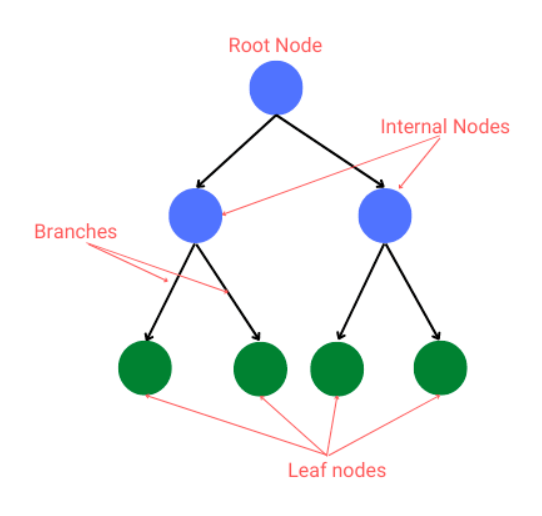

Chuy·ªÉn ƒë·ªïi k·∫øt qu·∫£ c·ªßa **GridSearchCV** th√†nh m·ªôt **DataFrame** v√† tr·ª±c quan h√≥a:

In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('K·∫øt qu·∫£ Tinh ch·ªânh Si√™u tham s·ªë')
plt.xlabel('S·ªë l∆∞·ª£ng b·ªô ∆∞·ªõc l∆∞·ª£ng')
plt.ylabel('ƒê·ªô ch√≠nh x√°c')
plt.show()

##**4.Ma tr·∫≠n nh·∫ßm l·∫´n**

M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán s·∫Ω ƒë∆∞·ª£c ƒë√°nh gi√° tr√™n t·∫≠p ki·ªÉm tra. Ma tr·∫≠n nh·∫ßm l·∫´n ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ tr·ª±c quan h√≥a hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh. N√≥ hi·ªÉn th·ªã s·ªë l∆∞·ª£ng d·ª± ƒëo√°n ƒë√∫ng d∆∞∆°ng t√≠nh, ƒë√∫ng √¢m t√≠nh, sai d∆∞∆°ng t√≠nh v√† sai √¢m t√≠nh c·ªßa m√¥ h√¨nh.

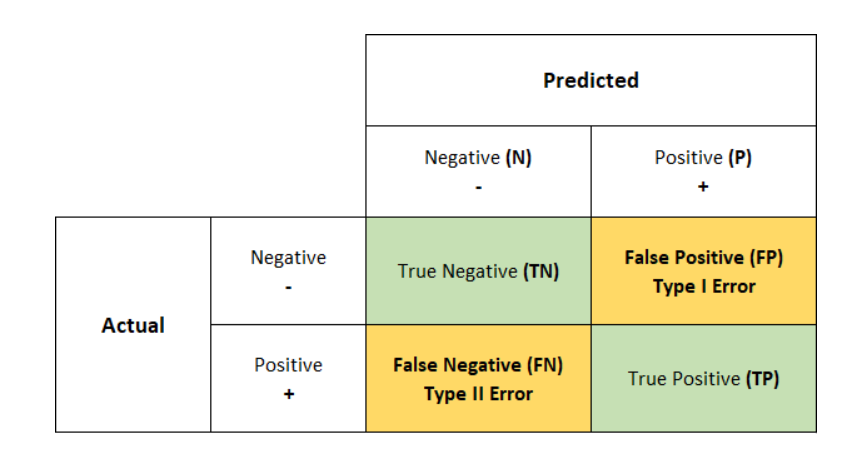

ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh:  0.9519326065411299
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1849
           1       0.67      0.85      0.75       169

    accuracy                           0.95      2018
   macro avg       0.83      0.91      0.86      2018
weighted avg       0.96      0.95      0.95      2018



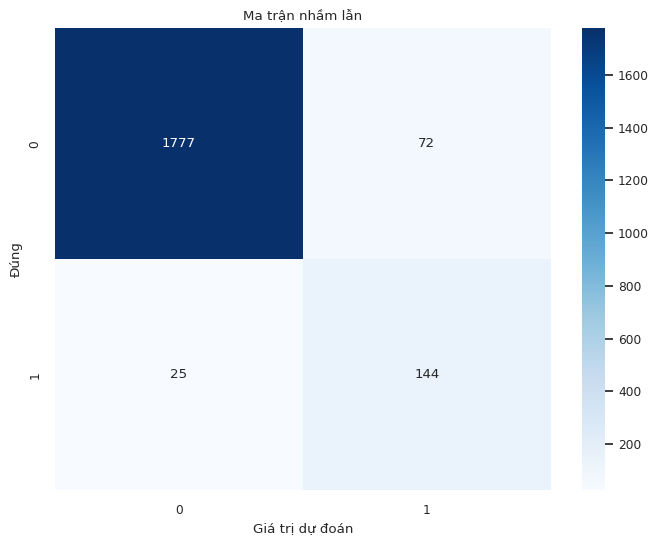

In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)
# Evaluate the model
print("ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma tr·∫≠n nh·∫ßm l·∫´n')
plt.xlabel('Gi√° tr·ªã d·ª± ƒëo√°n')
plt.ylabel('ƒê√∫ng')
plt.show()

### **Di·ªÖn gi·∫£i k·∫øt qu·∫£**  

M√¥ h√¨nh **Random Forest** sau khi hu·∫•n luy·ªán ƒë√£ ƒë·∫°t **ƒë·ªô ch√≠nh x√°c kho·∫£ng 95%**, cho th·∫•y r·∫±ng m√¥ h√¨nh ph√¢n lo·∫°i ƒë√∫ng kho·∫£ng **95%** t·ªïng s·ªë tr∆∞·ªùng h·ª£p trong t·∫≠p ki·ªÉm tra.  

### **Ph√¢n t√≠ch chi ti·∫øt theo t·ª´ng l·ªõp (0 v√† 1):**  

#### **A | L·ªõp 0 (Kh√¥ng m·∫Øc ti·ªÉu ƒë∆∞·ªùng)**  
- **ƒê·ªô ch√≠nh x√°c (Precision) = 0.98** ‚Üí Trong s·ªë c√°c tr∆∞·ªùng h·ª£p m√¥ h√¨nh d·ª± ƒëo√°n **kh√¥ng m·∫Øc ti·ªÉu ƒë∆∞·ªùng**, **98%** th·ª±c s·ª± l√† kh√¥ng m·∫Øc b·ªánh.  
- **ƒê·ªô nh·ªõ (Recall) = 0.97** ‚Üí M√¥ h√¨nh ph√°t hi·ªán ƒë√∫ng **97%** t·ªïng s·ªë ca kh√¥ng m·∫Øc b·ªánh trong d·ªØ li·ªáu.  

#### **B | L·ªõp 1 (M·∫Øc ti·ªÉu ƒë∆∞·ªùng)**  
- **ƒê·ªô ch√≠nh x√°c (Precision) = 0.71** ‚Üí Khi m√¥ h√¨nh d·ª± ƒëo√°n **m·∫Øc ti·ªÉu ƒë∆∞·ªùng**, n√≥ ƒë√∫ng kho·∫£ng **71%**.  
- **ƒê·ªô nh·ªõ (Recall) = 0.83** ‚Üí M√¥ h√¨nh ph√°t hi·ªán ƒë√∫ng **83%** t·ªïng s·ªë ca m·∫Øc b·ªánh th·ª±c s·ª±.  

### **ƒê√°nh gi√° t·ªïng th·ªÉ**  
- **F1-score** (trung b√¨nh ƒëi·ªÅu h√≤a gi·ªØa Precision v√† Recall) c·ªßa m√¥ h√¨nh:  
  - **0.98** cho l·ªõp **0** (Kh√¥ng m·∫Øc ti·ªÉu ƒë∆∞·ªùng).  
  - **0.77** cho l·ªõp **1** (M·∫Øc ti·ªÉu ƒë∆∞·ªùng).  
- **F1-score trung b√¨nh c√≥ tr·ªçng s·ªë ‚âà 0.95**, ph·∫£n √°nh hi·ªáu su·∫•t t·ªïng th·ªÉ c·ªßa m√¥ h√¨nh, t∆∞∆°ng ƒë·ªìng v·ªõi **ƒë·ªô ch√≠nh x√°c 96%**.  

üí° **Nh·∫≠n x√©t:**  
M√¥ h√¨nh ho·∫°t ƒë·ªông r·∫•t t·ªët trong vi·ªác ph√°t hi·ªán **ng∆∞·ªùi kh√¥ng m·∫Øc ti·ªÉu ƒë∆∞·ªùng** nh∆∞ng c√≤n h·∫°n ch·∫ø trong vi·ªác **ph√°t hi·ªán ch√≠nh x√°c ng∆∞·ªùi m·∫Øc ti·ªÉu ƒë∆∞·ªùng** (Precision th·∫•p cho l·ªõp 1). ƒêi·ªÅu n√†y c√≥ th·ªÉ do d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng ho·∫∑c c·∫ßn ƒëi·ªÅu ch·ªânh th√™m si√™u tham s·ªë.

##**5.T·∫ßm quan tr·ªçng c·ªßa nh√£n**

Cu·ªëi c√πng, t·∫ßm quan tr·ªçng c·ªßa t·ª´ng nh√£n ƒë∆∞·ª£c t√≠nh to√°n. ƒê√¢y l√† t·ªïng m·ª©c gi·∫£m ƒë·ªô tinh khi·∫øt c·ªßa n√∫t (ƒë∆∞·ª£c tr·ªçng s·ªë b·ªüi x√°c su·∫•t ƒë·∫°t ƒë·∫øn n√∫t ƒë√≥, ∆∞·ªõc l∆∞·ª£ng b·∫±ng t·ª∑ l·ªá m·∫´u ƒë·∫°t ƒë·∫øn n√∫t ƒë√≥) v√† ƒë∆∞·ª£c t√≠nh trung b√¨nh tr√™n t·∫•t c·∫£ c√°c c√¢y trong m√¥ h√¨nh t·∫≠p h·ª£p.

T·∫ßm quan tr·ªçng c·ªßa nh√£n cung c·∫•p c√°i nh√¨n s√¢u s·∫Øc v·ªÅ nh·ªØng nh√£n n√†o h·ªØu √≠ch nh·∫•t trong vi·ªác ƒë∆∞a ra d·ª± ƒëo√°n. C√°c nh√£n ƒë∆∞·ª£c x·∫øp h·∫°ng theo m·ª©c ƒë·ªô quan tr·ªçng c·ªßa ch√∫ng

                      ƒê·∫∑c tr∆∞ng  ƒê·ªô quan tr·ªçng
2                   HbA1c_level           0.42
3           blood_glucose_level           0.32
0                           age           0.13
1                           BMI           0.07
4                  hypertension           0.03
5                 heart_disease           0.01
9    smoking_history_non-smoker           0.01
10  smoking_history_past_smoker           0.00
7                   gender_Male           0.00
6                 gender_Female           0.00
8       smoking_history_current           0.00


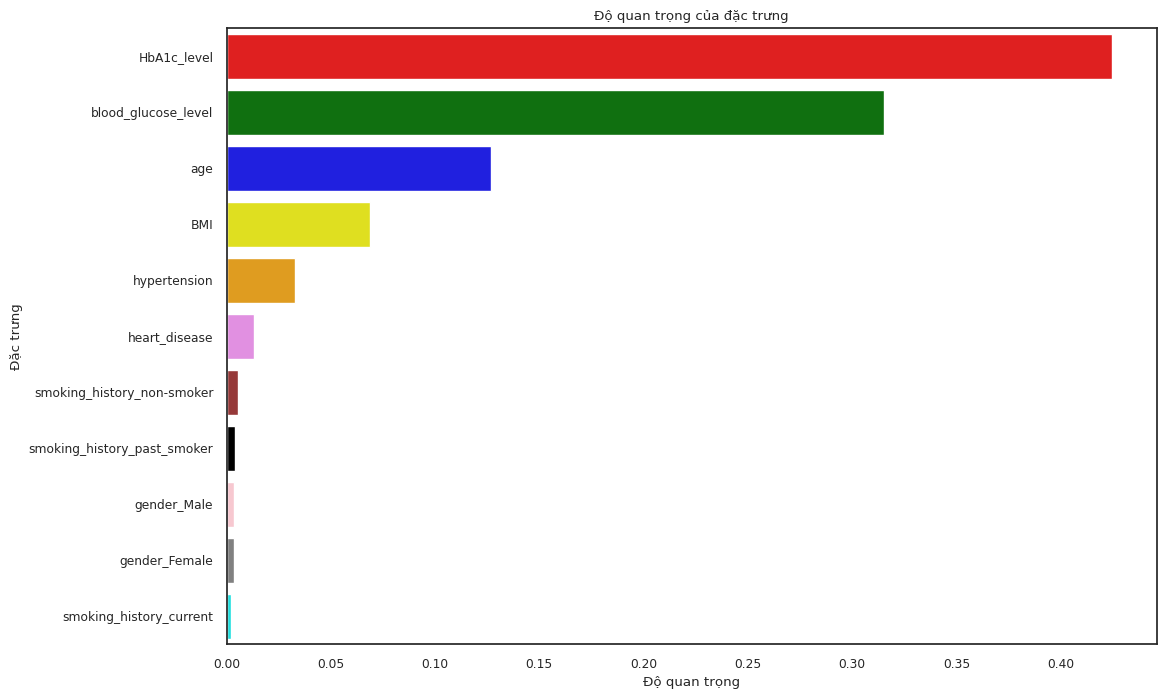

In [ ]:
# Sau khi hu·∫•n luy·ªán m√¥ h√¨nh, nh·∫≠p t√™n c√°c nh√£n.
onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))
# Th√™m t√™n nh√£n d∆∞·ªõi d·∫°ng s·ªë.
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns
# L·∫•y ƒë·ªô quan tr·ªçng c·ªßa c√°c nh√£n
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
# Bi·ªÉu di·ªÖn ƒë·ªô quan tr·ªçng c·ªßa c√°c nh√£n
importance_df = pd.DataFrame({'ƒê·∫∑c tr∆∞ng': feature_names, 'ƒê·ªô quan tr·ªçng': importances})
importance_df = importance_df.sort_values('ƒê·ªô quan tr·ªçng', ascending=False)
print(importance_df)
plt.figure(figsize=(12, 8))
sns.barplot(x='ƒê·ªô quan tr·ªçng', y='ƒê·∫∑c tr∆∞ng', data=importance_df,palette = [
    "#FF0000",  # Red
    "#008000",  # Green
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FFA500",  # Orange
    "#EE82EE",  # Violet
    "#A52A2A",  # Brown
    "#000000",  # Black
    "#FFC0CB",  # Pink
    "#808080",  # Gray
    "#00FFFF"   # Cyan (th√™m m√†u ƒë·ªÉ ƒë·ªß 11 m√†u)
])
plt.title('ƒê·ªô quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng')
plt.show()

K·∫øt qu·∫£ v·ªÅ t·∫ßm quan tr·ªçng c·ªßa c√°c nh√£n cung c·∫•p c√°i nh√¨n s√¢u s·∫Øc v·ªÅ nh·ªØng y·∫øu t·ªë c√≥ ·∫£nh h∆∞·ªüng l·ªõn nh·∫•t trong vi·ªác d·ª± ƒëo√°n b·ªánh ti·ªÉu ƒë∆∞·ªùng b·∫±ng m√¥ h√¨nh Random Forest. M·ª©c ƒë·ªô quan tr·ªçng c·ªßa m·ªôt nh√£n ƒë∆∞·ª£c t√≠nh d·ª±a tr√™n m·ª©c ƒë·ªô m√† c√°c n√∫t trong c√¢y s·ª≠ d·ª•ng nh√£n ƒë√≥ gi√∫p gi·∫£m ƒë·ªô nhi·ªÖu tr√™n to√†n b·ªô r·ª´ng c√¢y.  

D∆∞·ªõi ƒë√¢y l√† nh·ªØng ph√°t hi·ªán ch√≠nh t·ª´ k·∫øt qu·∫£ t·∫ßm quan tr·ªçng c·ªßa nh√£n:  

**HbA1c_level** l√† nh√£n quan tr·ªçng nh·∫•t v·ªõi m·ª©c ƒë·ªô quan tr·ªçng l√† **0.43**. HbA1c l√† ch·ªâ s·ªë ƒëo l∆∞·ª£ng ƒë∆∞·ªùng trong m√°u trung b√¨nh trong v√≤ng 2 ƒë·∫øn 3 th√°ng qua, v√¨ v·∫≠y kh√¥ng c√≥ g√¨ ng·∫°c nhi√™n khi ƒë√¢y l√† m·ªôt y·∫øu t·ªë d·ª± b√°o quan tr·ªçng ƒë·ªëi v·ªõi b·ªánh ti·ªÉu ƒë∆∞·ªùng.  

**blood_glucose_level** l√† nh√£n quan tr·ªçng th·ª© hai v·ªõi m·ª©c ƒë·ªô quan tr·ªçng l√† **0.3**. ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi ki·∫øn th·ª©c y khoa, v√¨ m·ª©c ƒë∆∞·ªùng huy·∫øt l√† y·∫øu t·ªë tr·ª±c ti·∫øp ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ch·∫©n ƒëo√°n b·ªánh ti·ªÉu ƒë∆∞·ªùng.  

**Age** l√† nh√£n quan tr·ªçng th·ª© ba v·ªõi m·ª©c ƒë·ªô quan tr·ªçng l√† **0.13**. ƒê√£ c√≥ nhi·ªÅu nghi√™n c·ª©u cho th·∫•y nguy c∆° m·∫Øc b·ªánh ti·ªÉu ƒë∆∞·ªùng lo·∫°i 2 tƒÉng l√™n theo ƒë·ªô tu·ªïi.  

**BMI** ƒë·ª©ng th·ª© t∆∞ v·ªõi m·ª©c ƒë·ªô quan tr·ªçng **0.07**. Ch·ªâ s·ªë kh·ªëi c∆° th·ªÉ (BMI) l√† m·ªôt y·∫øu t·ªë nguy c∆° quan tr·ªçng c·ªßa b·ªánh ti·ªÉu ƒë∆∞·ªùng v√† ƒë√£ ƒë∆∞·ª£c ghi nh·∫≠n trong nhi·ªÅu t√†i li·ªáu y khoa.  

C√°c ƒë·∫∑c tr∆∞ng kh√°c nh∆∞ **hypertension** (tƒÉng huy·∫øt √°p) v√† **heart_disease** (b·ªánh tim) c√≥ m·ª©c ƒë·ªô quan tr·ªçng l·∫ßn l∆∞·ª£t l√† **0.02** v√† **0.01**, cho th·∫•y r·∫±ng nh·ªØng b·ªánh l√Ω n√†y c√≥ th·ªÉ c√≥ ·∫£nh h∆∞·ªüng ƒë·∫øn nguy c∆° m·∫Øc b·ªánh ti·ªÉu ƒë∆∞·ªùng, nh∆∞ng kh√¥ng quan tr·ªçng b·∫±ng b·ªën y·∫øu t·ªë h√†ng ƒë·∫ßu.  

**L·ªãch s·ª≠ h√∫t thu·ªëc** (*smoking_history_non-smoker*, *smoking_history_past_smoker*, *smoking_history_current*) v√† **gi·ªõi t√≠nh** (*gender_Female*, *gender_Male*) ƒë∆∞·ª£c ƒë√°nh gi√° l√† c√≥ m·ª©c ƒë·ªô quan tr·ªçng t·ªëi thi·ªÉu ho·∫∑c b·∫±ng kh√¥ng trong m√¥ h√¨nh. ƒêi·ªÅu n√†y c√≥ th·ªÉ do nhi·ªÅu nguy√™n nh√¢n, ch·∫≥ng h·∫°n nh∆∞ nh·ªØng y·∫øu t·ªë n√†y kh√¥ng c√≥ ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn s·ª± ph√°t tri·ªÉn c·ªßa b·ªánh ti·ªÉu ƒë∆∞·ªùng, ho·∫∑c c√≥ th·ªÉ do c√°ch d·ªØ li·ªáu ƒë∆∞·ª£c thu th·∫≠p v√† c·∫•u tr√∫c.

In [ ]:
new_X_test = pd.DataFrame([{
    'gender': 'Male',
    'age': 73,
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'non-smoker',
    'bmi': 25.91,
    'HbA1c_level': 9,
    'blood_glucose_level': 160
}])
new_y_pred = grid_search.predict(new_X_test)

print("D·ª± ƒëo√°n cho d·ªØ li·ªáu m·ªõi:", new_y_pred)


D·ª± ƒëo√°n cho d·ªØ li·ªáu m·ªõi: [1]
